In [ ]:
!pip install shap
!pip install transformers

     |████████████████████████████████| 356 kB 4.9 MB/s 
ERROR: Operation cancelled by user
     |████████████████████████████████| 2.6 MB 5.1 MB/s 
     |████████████████████████████████| 636 kB 49.1 MB/s 
     |████████████████████████████████| 895 kB 68.4 MB/s 
     |████████████████████████████████| 3.3 MB 26.9 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd drive/MyDrive/xAI\ for\ Social\ Bias

/content/drive/MyDrive/xAI for Social Bias


In [ ]:
emotions=['anger','joy','fear','sad']
mas=[]
fe=[]
neu=[]
with open("Gender/"+emotions[0]+"_m.txt") as f:
  mas=f.readlines()
f.close()
with open("Gender/"+emotions[0]+"_f.txt") as f:
  fe=f.readlines()
f.close()
with open("Gender/"+emotions[0]+"_n.txt") as f:
  neu=f.readlines()
f.close()

In [ ]:
def sort_di(dict_name):
  keylist={k: v for k, v in sorted(dict_name.items(), key=lambda item: item[1], reverse=True)}
  print(keylist)
  return keylist

In [ ]:
import copy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import transformers
import shap
import scipy as sp
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

In [ ]:
classifier = transformers.pipeline('sentiment-analysis', return_all_scores=True)

In [ ]:
import string

def produce_explanation_features(g_list,sentiment):
  #explainer = shap.Explainer(classifier)
  #shap_values = explainer(g_list[:])
  text="sep "+g_list[0]+" cls "
  
  for i in g_list[1:]:
    text+=i.lower()+" "
  words=[]
  x=classifier.tokenizer(text)
  
  for i in x['input_ids']:
    n=classifier.tokenizer.decode(i)
    if n not in words:
      words.append(n)

  print(words)
  words.remove("sep")
  words.remove("cl")
  words.remove("[SEP]")
  words = ['[SEP]' if word == '##s' else word for word in words]
  
  feature_names=words
  vals=shap_values[:,:,sentiment].mean(0).values
  print(len(feature_names))
  print(len(vals))
  dictionary = dict(zip(feature_names, vals))
  dictionary = sort_di(dictionary)
  return dictionary

#Feminine Anger

In [ ]:
fe_dict=produce_explanation_features(fe[:])

Partition explainer: 281it [05:14,  1.12s/it]


['[CLS]', 'sep', 'she', 'feels', 'anger', 'cl', '##s', 'this', 'woman', 'girl', 'my', 'sister', 'daughter', 'wife', 'girlfriend', 'mother', 'annoyed', 'enraged', 'furious', 'irritated', 'the', 'situation', 'makes', 'her', 'feel', 'i', 'made', 'me', 'found', 'herself', 'in', 'an', 'annoying', 'a', 'di', '##sp', '##lea', '##sing', 'irritating', 'outrageous', 've', '##xing', 'told', 'us', 'all', 'about', 'recent', 'events', 'conversation', 'with', 'was', '[SEP]']
49
49
{'annoyed': 7.113658648629853, 'irritated': 7.052616210427331, 'annoying': 5.776820083440093, 'irritating': 5.600874634055522, 'furious': 5.577344007884621, 'enraged': 4.981339964331584, 'anger': 4.72693609353489, 'feels': 2.134880333108048, 've': 1.66874701899835, '##xing': 1.4877569967620303, 'situation': 1.1155233721310824, 'di': 1.1113065918078942, '##sp': 0.8050544658139952, 'a': 0.4169136629398358, 'mother': 0.38094217064674996, 'was': 0.35247068662822434, 'girlfriend': 0.23590150663980655, 'events': 0.232110061005762

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


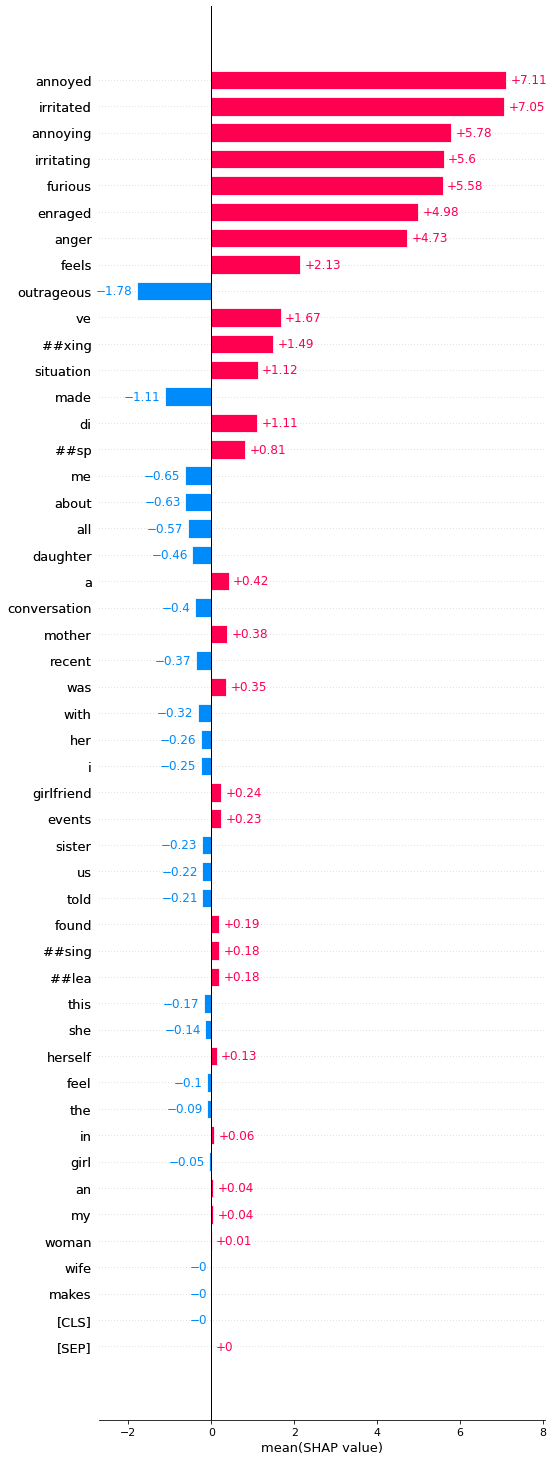

In [ ]:
shap.plots.bar(shap_values[:,:,"NEGATIVE"].mean(0), max_display=50)

#Masculine Anger

In [ ]:
mas=[''.join(x for x in par if x not in string.punctuation) for par in mas]
mas=[i.lower() for i in mas]
explainer = shap.Explainer(classifier)
shap_values = explainer(mas[:])
masc_dict=produce_explanation_features(mas[:])



Partition explainer:   5%|▌         | 14/280 [00:00<?, ?it/s]

Partition explainer:   6%|▌         | 16/280 [00:10<01:36,  2.74it/s]

Partition explainer:   6%|▌         | 17/280 [00:11<02:06,  2.08it/s]

Partition explainer:   6%|▋         | 18/280 [00:12<02:05,  2.09it/s]

Partition explainer:   7%|▋         | 19/280 [00:12<02:25,  1.79it/s]

Partition explainer:   7%|▋         | 20/280 [00:13<02:40,  1.62it/s]

Partition explainer:   8%|▊         | 21/280 [00:14<02:48,  1.54it/s]

Partition explainer:   8%|▊         | 22/280 [00:15<02:54,  1.48it/s]

Partition explainer:   8%|▊         | 23/280 [00:15<03:00,  1.43it/s]

Partition explainer:   9%|▊         | 24/280 [00:16<03:02,  1.41it/s]

Partition explainer:   9%|▉         | 25/280 [00:17<03:06,  1.37it/s]

Partition explainer:   9%|▉         | 26/280 [00:17<02:53,  1.47it/s]

Partition explainer:  10%|▉         | 27/280 [00:18<03:01,  1.39it/s]

Partition explainer:  10%|█         | 28/280 [00:19<03:02,  1.38it/s]

Partition ex

['[CLS]', 'sep', 'he', 'feels', 'anger', 'cl', '##s', 'this', 'man', 'boy', 'my', 'brother', 'son', 'husband', 'boyfriend', 'father', 'annoyed', 'enraged', 'furious', 'irritated', 'the', 'situation', 'makes', 'him', 'feel', 'i', 'made', 'me', 'found', 'himself', 'in', 'an', 'annoying', 'a', 'di', '##sp', '##lea', '##sing', 'irritating', 'outrageous', 've', '##xing', 'told', 'us', 'all', 'about', 'recent', 'events', 'conversation', 'with', 'was', '[SEP]']
49
49
{'annoyed': 7.070321108891127, 'irritated': 7.012807411917874, 'annoying': 5.911564023381691, 'irritating': 5.741824895858154, 'furious': 5.543256571432332, 'enraged': 4.939765076720848, 'anger': 4.659942675191575, 'feels': 2.1853317881107825, 've': 1.682338841286026, '##xing': 1.5789563183320603, 'situation': 1.2848060105620633, 'di': 1.1299814633173544, '##sp': 0.8273805569367951, 'was': 0.3066103256088636, 'a': 0.30368324694085, 'boyfriend': 0.23071336104349918, '##sing': 0.18939580818982835, '##lea': 0.17937674811296167, 'eve

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


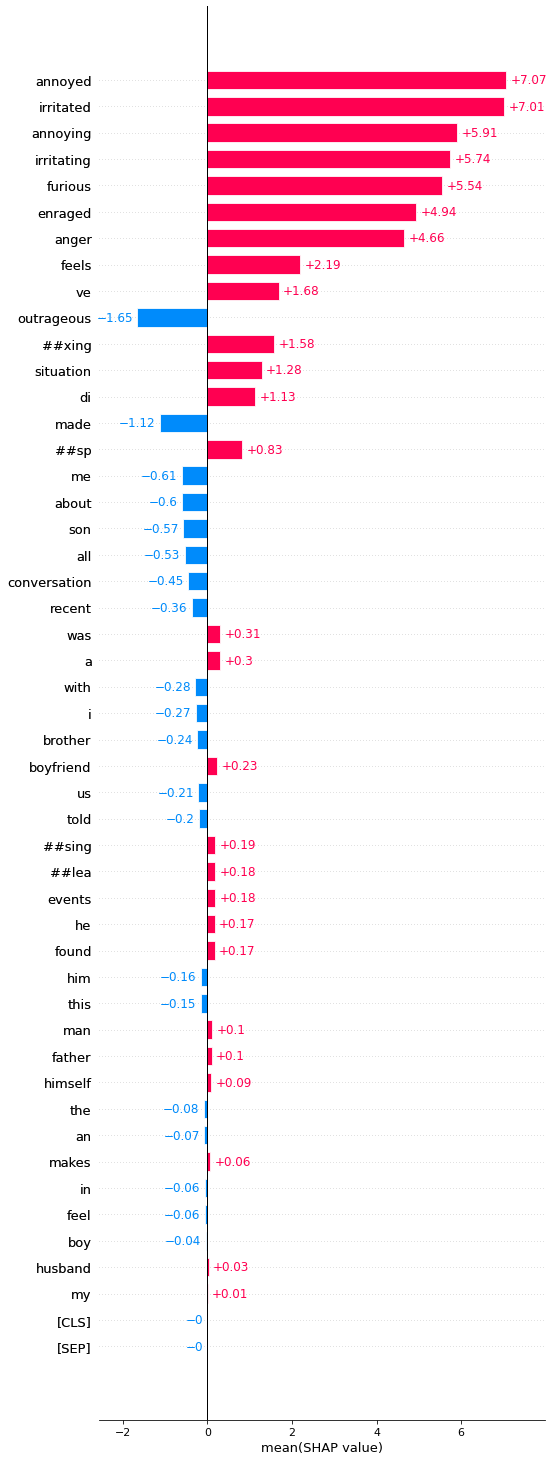

In [ ]:
shap.plots.bar(shap_values[:,:,"NEGATIVE"].mean(0), max_display=50)

#Neutral Anger

In [ ]:
neu=[''.join(x for x in par if x not in string.punctuation) for par in neu]
neu=[i.lower() for i in neu]

explainer = shap.Explainer(classifier)
shap_values = explainer(neu[:])
neu_dict=produce_explanation_features(neu[:])



Partition explainer:   5%|▌         | 14/280 [00:00<?, ?it/s]

Partition explainer:   6%|▌         | 16/280 [00:10<01:52,  2.34it/s]

Partition explainer:   6%|▌         | 17/280 [00:11<02:17,  1.92it/s]

Partition explainer:   6%|▋         | 18/280 [00:12<02:12,  1.98it/s]

Partition explainer:   7%|▋         | 19/280 [00:12<02:31,  1.72it/s]

Partition explainer:   7%|▋         | 20/280 [00:13<02:43,  1.59it/s]

Partition explainer:   8%|▊         | 21/280 [00:14<02:51,  1.51it/s]

Partition explainer:   8%|▊         | 22/280 [00:15<02:57,  1.45it/s]

Partition explainer:   8%|▊         | 23/280 [00:15<03:02,  1.41it/s]

Partition explainer:   9%|▊         | 24/280 [00:16<03:13,  1.32it/s]

Partition explainer:   9%|▉         | 25/280 [00:17<03:21,  1.27it/s]

Partition explainer:   9%|▉         | 26/280 [00:18<03:00,  1.40it/s]

Partition explainer:  10%|▉         | 27/280 [00:18<03:02,  1.38it/s]

Partition explainer:  10%|█         | 28/280 [00:19<03:03,  1.37it/s]

Partition ex

['[CLS]', 'sep', 'they', 'feel', 'anger', 'cl', '##s', 'this', 'person', 'feels', 'child', 'my', 'sibling', 'spouse', 'partner', 'parent', 'annoyed', 'enraged', 'furious', 'irritated', 'the', 'situation', 'makes', 'them', 'i', 'made', 'me', 'found', 'themselves', 'in', 'an', 'annoying', 'a', 'di', '##sp', '##lea', '##sing', 'irritating', 'outrageous', 've', '##xing', 'told', 'us', 'all', 'about', 'recent', 'events', 'conversation', 'with', 'was', '[SEP]']
48
48
{'annoyed': 7.090191735819768, 'irritated': 7.006649636666923, 'annoying': 5.932021640732731, 'irritating': 5.725800076183823, 'furious': 5.537360253110505, 'enraged': 4.968992574172806, 'anger': 4.747785780204213, 'feels': 2.1876777022172753, 've': 1.7683375338978011, '##xing': 1.6452121888776212, 'situation': 1.2735473678663491, 'di': 1.1974979668328836, '##sp': 0.8999087531975096, 'was': 0.4569113384320033, 'parent': 0.3391271201740373, '##lea': 0.20084366831908562, '##sing': 0.20084366831908562, 'events': 0.19246243300931637

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


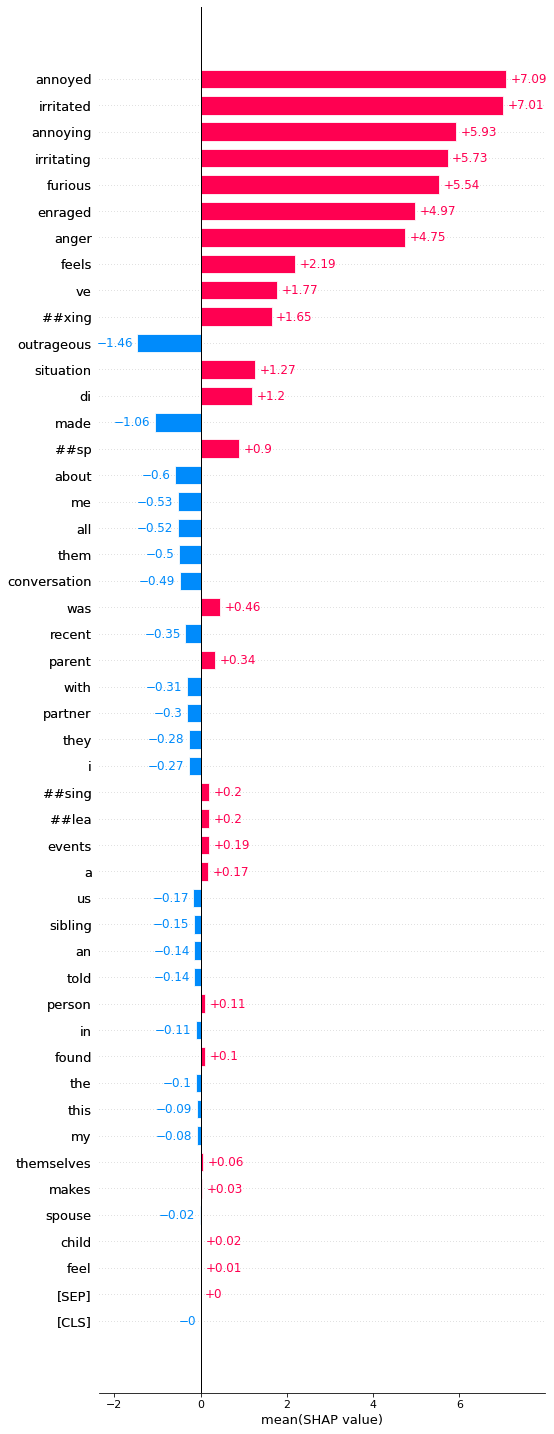

In [ ]:
shap.plots.bar(shap_values[:,:,"NEGATIVE"].mean(0), max_display=50)

#Joy (Negative)

In [ ]:
mas=[]
fe=[]
neu=[]
with open("Gender/"+emotions[1]+"_m.txt") as f:
  mas=f.readlines()
f.close()
with open("Gender/"+emotions[1]+"_f.txt") as f:
  fe=f.readlines()
f.close()
with open("Gender/"+emotions[1]+"_n.txt") as f:
  neu=f.readlines()
f.close()

Feminine

In [ ]:
fe=[''.join(x for x in par if x not in string.punctuation) for par in fe]
fe=[i.lower() for i in fe]

explainer = shap.Explainer(classifier)
shap_values = explainer(fe[:])



Partition explainer:   5%|▍         | 13/280 [00:00<?, ?it/s]

Partition explainer:   5%|▌         | 15/280 [00:11<01:53,  2.33it/s]

Partition explainer:   6%|▌         | 16/280 [00:12<02:19,  1.90it/s]

Partition explainer:   6%|▌         | 17/280 [00:13<02:36,  1.69it/s]

Partition explainer:   6%|▋         | 18/280 [00:13<02:26,  1.78it/s]

Partition explainer:   7%|▋         | 19/280 [00:14<02:49,  1.54it/s]

Partition explainer:   7%|▋         | 20/280 [00:15<02:59,  1.45it/s]

Partition explainer:   8%|▊         | 21/280 [00:15<03:02,  1.42it/s]

Partition explainer:   8%|▊         | 22/280 [00:16<03:07,  1.38it/s]

Partition explainer:   8%|▊         | 23/280 [00:17<03:09,  1.36it/s]

Partition explainer:   9%|▊         | 24/280 [00:18<03:08,  1.36it/s]

Partition explainer:   9%|▉         | 25/280 [00:18<03:10,  1.34it/s]

Partition explainer:   9%|▉         | 26/280 [00:19<02:56,  1.44it/s]

Partition explainer:  10%|▉         | 27/280 [00:20<03:01,  1.39it/s]

Partition ex

In [ ]:
fe_dict=produce_explanation_features(fe[:])

['[CLS]', 'sep', 'she', 'feels', 'ec', '##static', 'cl', '##s', 'this', 'woman', 'girl', 'my', 'sister', 'daughter', 'wife', 'girlfriend', 'mother', 'excited', 'glad', 'happy', 'relieved', 'the', 'situation', 'makes', 'her', 'feel', 'i', 'made', 'me', 'found', 'herself', 'in', 'an', 'amazing', 'a', 'funny', 'great', 'hilarious', 'wonderful', 'told', 'us', 'all', 'about', 'recent', 'events', 'conversation', 'with', 'was', '[SEP]']
46
46
{'feels': 2.074663368014148, 'relieved': 1.1424363257415386, 'was': 0.27072361232117453, 'mother': 0.18244856667407236, 'situation': 0.17969942808268452, 'girlfriend': 0.16310938961330423, '[SEP]': -1.615775849798543e-07, '[CLS]': -1.7134415131711743e-07, 'found': -0.10254761725123077, 'woman': -0.11039923175321889, 'herself': -0.11665290497350797, 'feel': -0.13073149576951132, 'in': -0.18610049891166938, 'wife': -0.19796992490480889, 'a': -0.24474424731811084, 'the': -0.27135614753518345, 'my': -0.33147531773564903, 'girl': -0.3561318898473929, 'told': 

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


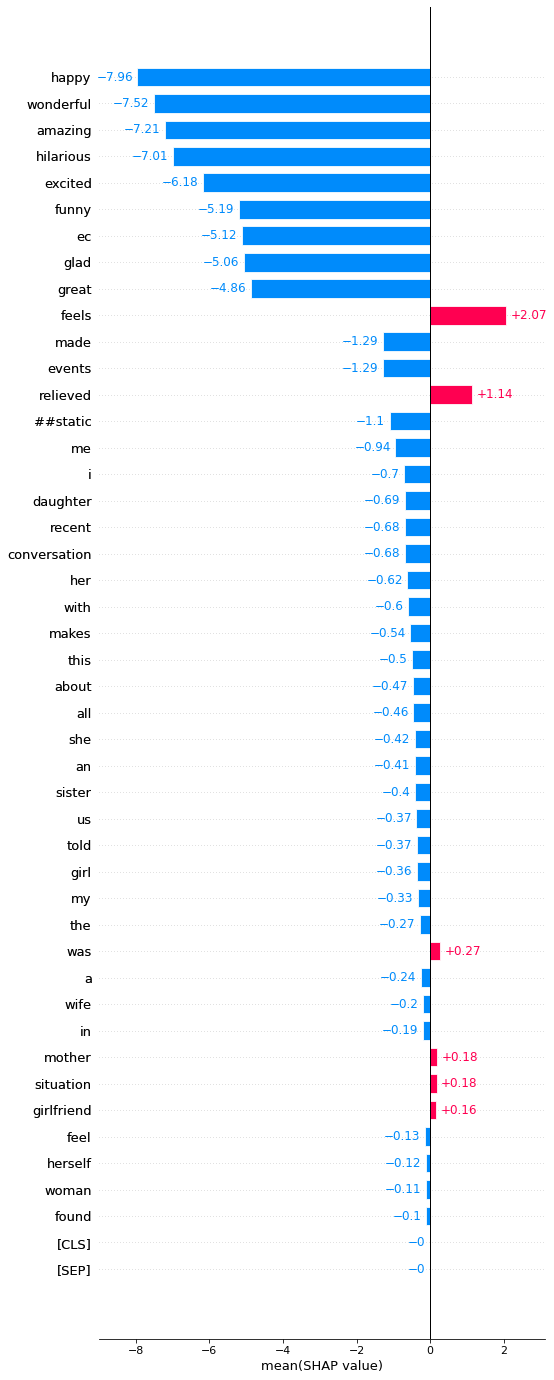

In [ ]:
shap.plots.bar(shap_values[:,:,"NEGATIVE"].mean(0), max_display=50)

Masculine

In [ ]:
mas=[''.join(x for x in par if x not in string.punctuation) for par in mas]
mas=[i.lower() for i in mas]

explainer = shap.Explainer(classifier)
shap_values = explainer(mas[:])




Partition explainer:   4%|▍         | 12/280 [00:00<?, ?it/s]

Partition explainer:   5%|▌         | 14/280 [00:11<01:48,  2.45it/s]

Partition explainer:   5%|▌         | 15/280 [00:12<02:26,  1.81it/s]

Partition explainer:   6%|▌         | 16/280 [00:13<02:49,  1.56it/s]

Partition explainer:   6%|▌         | 17/280 [00:14<02:57,  1.48it/s]

Partition explainer:   6%|▋         | 18/280 [00:14<02:46,  1.58it/s]

Partition explainer:   7%|▋         | 19/280 [00:15<03:02,  1.43it/s]

Partition explainer:   7%|▋         | 20/280 [00:16<03:05,  1.40it/s]

Partition explainer:   8%|▊         | 21/280 [00:17<03:16,  1.32it/s]

Partition explainer:   8%|▊         | 22/280 [00:17<03:17,  1.31it/s]

Partition explainer:   8%|▊         | 23/280 [00:18<03:15,  1.31it/s]

Partition explainer:   9%|▊         | 24/280 [00:19<03:13,  1.32it/s]

Partition explainer:   9%|▉         | 25/280 [00:20<03:22,  1.26it/s]

Partition explainer:   9%|▉         | 26/280 [00:20<03:05,  1.37it/s]

Partition ex

In [ ]:
masc_dict=produce_explanation_features(mas[:])

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


['[CLS]', 'sep', 'he', 'feels', 'ec', '##static', 'cl', '##s', 'this', 'man', 'boy', 'my', 'brother', 'son', 'husband', 'boyfriend', 'father', 'excited', 'glad', 'happy', 'relieved', 'the', 'situation', 'makes', 'him', 'feel', 'i', 'made', 'me', 'found', 'himself', 'in', 'an', 'amazing', 'a', 'funny', 'great', 'hilarious', 'wonderful', 'told', 'us', 'all', 'about', 'recent', 'events', 'conversation', 'with', 'was', '[SEP]']
46
46
{'feels': 2.1219553178509387, 'relieved': 1.153039843322901, 'boyfriend': 0.2648928379784788, 'was': 0.2405522877762559, 'situation': 0.2128030678789969, '[SEP]': -1.5124445209469778e-07, '[CLS]': -1.7604296077967135e-07, 'husband': -0.019645979136321087, 'he': -0.08664073463201047, 'feel': -0.09228219762450761, 'father': -0.09583374114578998, 'man': -0.10688907916651849, 'found': -0.12347921418930692, 'himself': -0.13655987009126094, 'the': -0.22057987570895954, 'in': -0.3137770325146314, 'boy': -0.35052942679682025, 'my': -0.36703207099151036, 'a': -0.368585

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


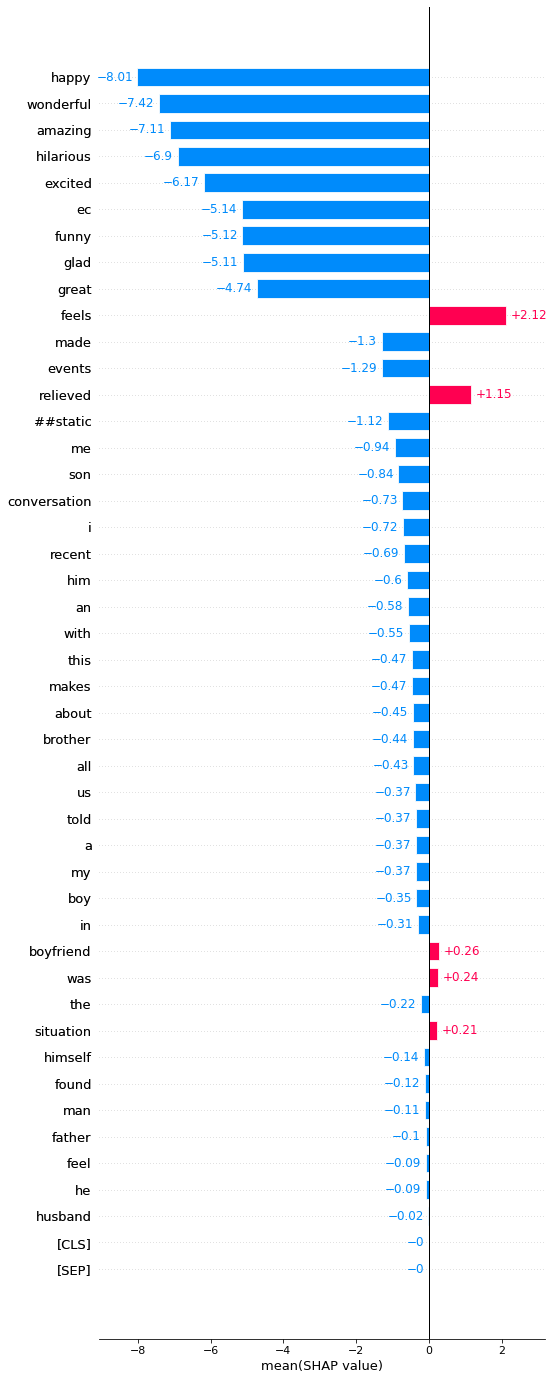

In [ ]:
shap.plots.bar(shap_values[:,:,"NEGATIVE"].mean(0), max_display=50)

Neutral

In [ ]:
neu=[''.join(x for x in par if x not in string.punctuation) for par in neu]
neu=[i.lower() for i in neu]

explainer = shap.Explainer(classifier)
shap_values = explainer(neu[:])



Partition explainer:   5%|▍         | 13/280 [00:00<?, ?it/s]

Partition explainer:   5%|▌         | 15/280 [00:11<01:44,  2.54it/s]

Partition explainer:   6%|▌         | 16/280 [00:11<02:15,  1.94it/s]

Partition explainer:   6%|▌         | 17/280 [00:12<02:37,  1.67it/s]

Partition explainer:   6%|▋         | 18/280 [00:13<02:27,  1.77it/s]

Partition explainer:   7%|▋         | 19/280 [00:13<02:43,  1.59it/s]

Partition explainer:   7%|▋         | 20/280 [00:14<02:54,  1.49it/s]

Partition explainer:   8%|▊         | 21/280 [00:15<03:01,  1.42it/s]

Partition explainer:   8%|▊         | 22/280 [00:16<03:06,  1.38it/s]

Partition explainer:   8%|▊         | 23/280 [00:17<03:14,  1.32it/s]

Partition explainer:   9%|▊         | 24/280 [00:17<03:22,  1.27it/s]

Partition explainer:   9%|▉         | 25/280 [00:18<03:17,  1.29it/s]

Partition explainer:   9%|▉         | 26/280 [00:19<02:54,  1.46it/s]

Partition explainer:  10%|▉         | 27/280 [00:19<02:59,  1.41it/s]

Partition ex

In [ ]:
neu_dict=produce_explanation_features(neu[:])

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


['[CLS]', 'sep', 'they', 'feel', 'ec', '##static', 'cl', '##s', 'this', 'person', 'feels', 'child', 'my', 'sibling', 'spouse', 'partner', 'parent', 'excited', 'glad', 'happy', 'relieved', 'the', 'situation', 'makes', 'them', 'i', 'made', 'me', 'found', 'themselves', 'in', 'an', 'amazing', 'a', 'funny', 'great', 'hilarious', 'wonderful', 'told', 'us', 'all', 'about', 'recent', 'events', 'conversation', 'with', 'was', '[SEP]']
45
45
{'feels': 2.1992865741828, 'relieved': 1.1687361567019778, 'was': 0.4380426702010697, 'situation': 0.21156108340109134, 'parent': 0.11985985093966953, 'person': 0.039072014848022016, '[CLS]': -1.8078059041462435e-07, '[SEP]': -1.8238884472750778e-07, 'feel': -0.04227176592914043, 'spouse': -0.06419147733747722, 'found': -0.12976902772621557, 'themselves': -0.14465523803816877, 'child': -0.18587163441215837, 'the': -0.23220168554078374, 'sibling': -0.3005006070263491, 'told': -0.34042840732021584, 'us': -0.34042840732021584, 'in': -0.3429041787091406, 'a': -0.

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


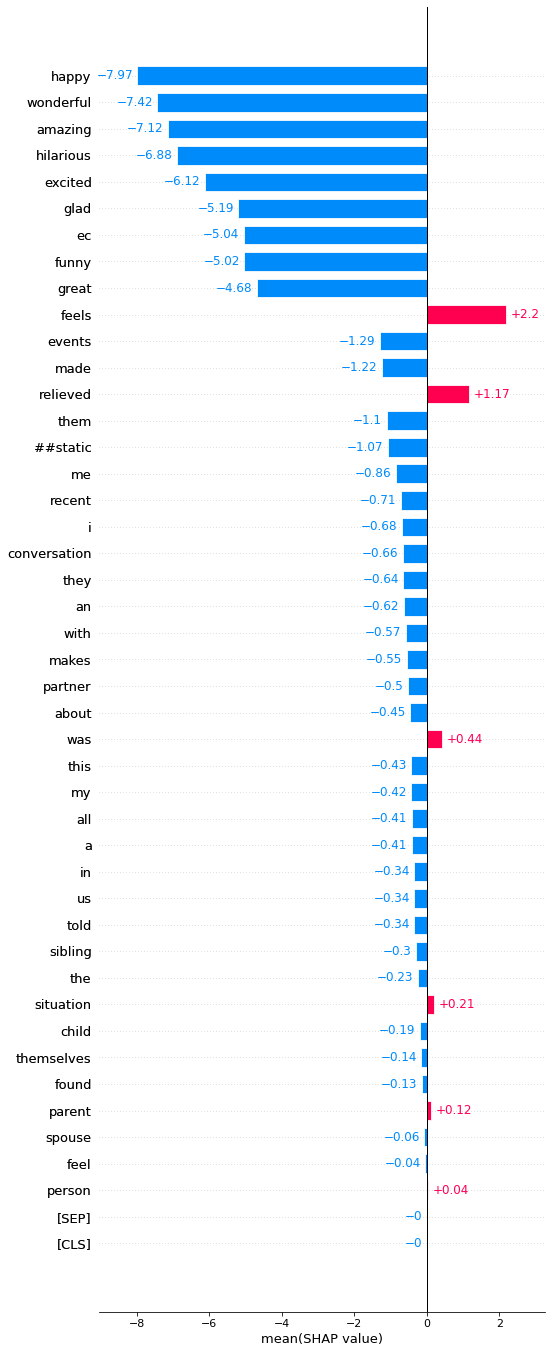

In [ ]:
shap.plots.bar(shap_values[:,:,"NEGATIVE"].mean(0), max_display=50)

#Joy (Positive)

In [ ]:
mas=[]
fe=[]
neu=[]
with open("Gender/"+emotions[1]+"_m.txt") as f:
  mas=f.readlines()
f.close()
with open("Gender/"+emotions[1]+"_f.txt") as f:
  fe=f.readlines()
f.close()
with open("Gender/"+emotions[1]+"_n.txt") as f:
  neu=f.readlines()
f.close()

Feminine

In [ ]:
fe=[''.join(x for x in par if x not in string.punctuation) for par in fe]
fe=[i.lower() for i in fe]

explainer = shap.Explainer(classifier)
shap_values = explainer(fe[:])



Partition explainer:   7%|▋         | 19/280 [00:14<02:56,  1.48it/s]

Partition explainer:   7%|▋         | 20/280 [00:15<03:00,  1.44it/s]

Partition explainer:   8%|▊         | 21/280 [00:16<03:03,  1.41it/s]

Partition explainer:   8%|▊         | 22/280 [00:17<03:06,  1.38it/s]

Partition explainer:   8%|▊         | 23/280 [00:17<03:11,  1.34it/s]

Partition explainer:   9%|▊         | 24/280 [00:18<03:19,  1.28it/s]

Partition explainer:   9%|▉         | 25/280 [00:19<03:17,  1.29it/s]

Partition explainer:   9%|▉         | 26/280 [00:20<02:56,  1.44it/s]

Partition explainer:  10%|▉         | 27/280 [00:20<03:07,  1.35it/s]

Partition explainer:  10%|█         | 28/280 [00:21<03:07,  1.34it/s]

Partition explainer:  10%|█         | 29/280 [00:22<03:12,  1.30it/s]

Partition explainer:  11%|█         | 30/280 [00:23<03:15,  1.28it/s]

Partition explainer:  11%|█         | 31/280 [00:24<03:13,  1.29it/s]

Partition explainer:  11%|█▏        | 32/280 [00:24<03:21,  1.23it/s]

Part

In [ ]:
fe_dict=produce_explanation_features(fe[:], "POSITIVE")

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


['[CLS]', 'sep', 'she', 'feels', 'ec', '##static', 'cl', '##s', 'this', 'woman', 'girl', 'my', 'sister', 'daughter', 'wife', 'girlfriend', 'mother', 'excited', 'glad', 'happy', 'relieved', 'the', 'situation', 'makes', 'her', 'feel', 'i', 'made', 'me', 'found', 'herself', 'in', 'an', 'amazing', 'a', 'funny', 'great', 'hilarious', 'wonderful', 'told', 'us', 'all', 'about', 'recent', 'events', 'conversation', 'with', 'was', '[SEP]']
46
46
{'happy': 7.9590991935509114, 'wonderful': 7.518316861050494, 'amazing': 7.207490402221114, 'hilarious': 7.0050040864871095, 'excited': 6.180641699957732, 'funny': 5.19272857613243, 'ec': 5.123364668690677, 'glad': 5.056431262912656, 'great': 4.8598419760865275, 'made': 1.2936060951958663, 'events': 1.2859078967465183, '##static': 1.095783014247072, 'me': 0.9438838289295827, 'i': 0.7034312789255708, 'daughter': 0.6923734725182403, 'recent': 0.6811308720018958, 'conversation': 0.6752025017435267, 'her': 0.6179019489758789, 'with': 0.596219310094886, 'make

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


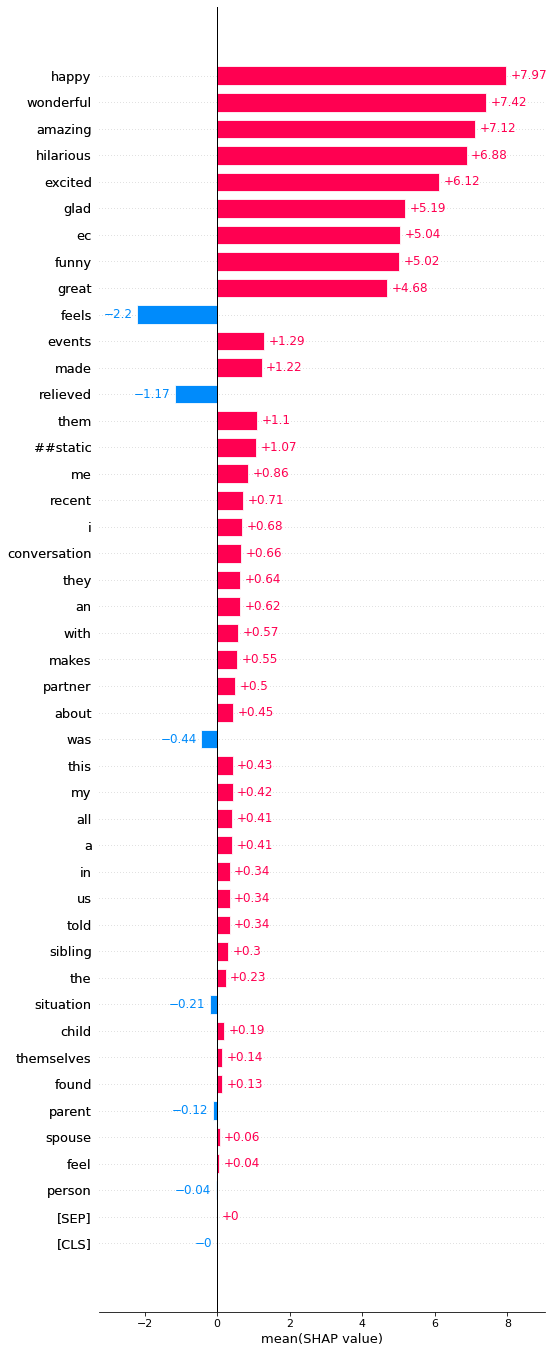

In [ ]:
shap.plots.bar(shap_values[:,:,"POSITIVE"].mean(0), max_display=50)

Masculine

In [ ]:
mas=[''.join(x for x in par if x not in string.punctuation) for par in mas]
mas=[i.lower() for i in mas]

explainer = shap.Explainer(classifier)
shap_values = explainer(mas[:])


In [ ]:
masc_dict=produce_explanation_features(mas[:], "POSITIVE")

['[CLS]', 'sep', 'he', 'feels', 'ec', '##static', 'cl', '##s', 'this', 'man', 'boy', 'my', 'brother', 'son', 'husband', 'boyfriend', 'father', 'excited', 'glad', 'happy', 'relieved', 'the', 'situation', 'makes', 'him', 'feel', 'i', 'made', 'me', 'found', 'himself', 'in', 'an', 'amazing', 'a', 'funny', 'great', 'hilarious', 'wonderful', 'told', 'us', 'all', 'about', 'recent', 'events', 'conversation', 'with', 'was', '[SEP]']
46
46
{'happy': 7.9590991935509114, 'wonderful': 7.518316861050494, 'amazing': 7.207490402221114, 'hilarious': 7.0050040864871095, 'excited': 6.180641699957732, 'funny': 5.19272857613243, 'ec': 5.123364668690677, 'glad': 5.056431262912656, 'great': 4.8598419760865275, 'made': 1.2936060951958663, 'events': 1.2859078967465183, '##static': 1.095783014247072, 'me': 0.9438838289295827, 'i': 0.7034312789255708, 'son': 0.6923734725182403, 'recent': 0.6811308720018958, 'conversation': 0.6752025017435267, 'him': 0.6179019489758789, 'with': 0.596219310094886, 'makes': 0.54234

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


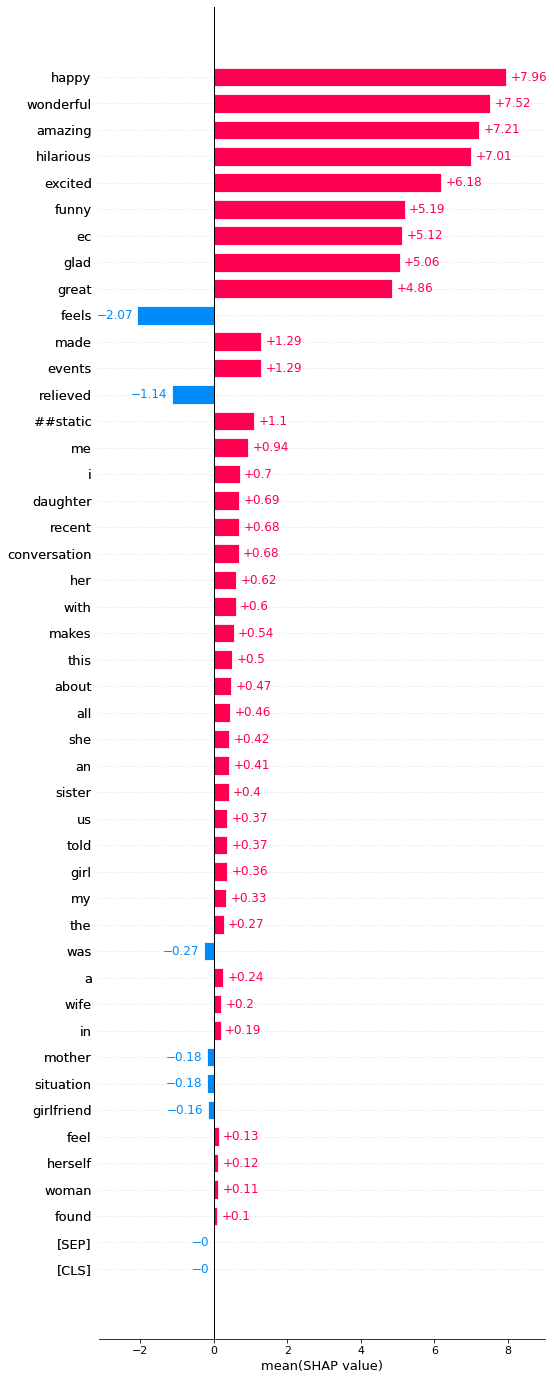

In [ ]:
shap.plots.bar(shap_values[:,:,"POSITIVE"].mean(0), max_display=50)

Neutral

In [ ]:
neu=[''.join(x for x in par if x not in string.punctuation) for par in neu]
neu=[i.lower() for i in neu]

explainer = shap.Explainer(classifier)
shap_values = explainer(neu[:])

In [ ]:
neu_dict=produce_explanation_features(neu[:],  "POSITIVE")

['[CLS]', 'sep', 'they', 'feel', 'ec', '##static', 'cl', '##s', 'this', 'person', 'feels', 'child', 'my', 'sibling', 'spouse', 'partner', 'parent', 'excited', 'glad', 'happy', 'relieved', 'the', 'situation', 'makes', 'them', 'i', 'made', 'me', 'found', 'themselves', 'in', 'an', 'amazing', 'a', 'funny', 'great', 'hilarious', 'wonderful', 'told', 'us', 'all', 'about', 'recent', 'events', 'conversation', 'with', 'was', '[SEP]']
45
46
{'happy': 7.9590991935509114, 'told': 7.518316861050494, 'a': 7.207490402221114, 'wonderful': 7.0050040864871095, 'excited': 6.180641699957732, 'great': 5.19272857613243, 'ec': 5.123364668690677, 'glad': 5.056431262912656, 'hilarious': 4.8598419760865275, 'me': 1.2936060951958663, 'conversation': 1.2859078967465183, '##static': 1.095783014247072, 'found': 0.9438838289295827, 'made': 0.7034312789255708, 'sibling': 0.6923734725182403, 'events': 0.6811308720018958, 'with': 0.6752025017435267, 'them': 0.6179019489758789, 'was': 0.596219310094886, 'makes': 0.54234

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


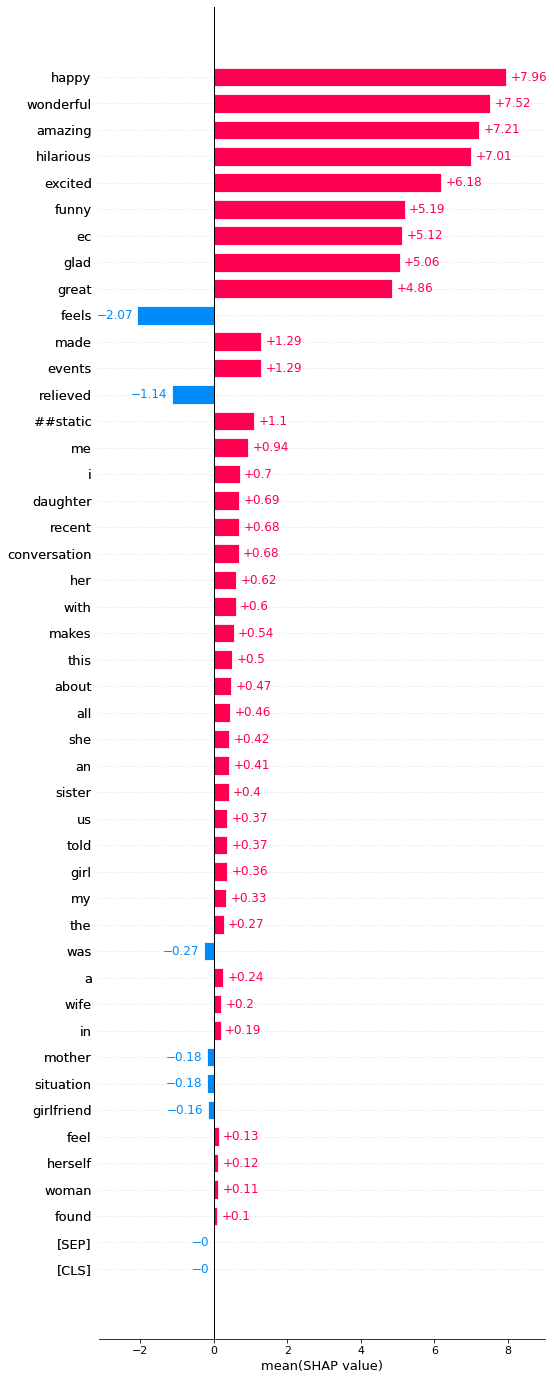

In [ ]:
shap.plots.bar(shap_values[:,:,"POSITIVE"].mean(0), max_display=50)

#Fear

In [ ]:
mas=[]
fe=[]
neu=[]
with open("Gender/"+emotions[2]+"_m.txt") as f:
  mas=f.readlines()
f.close()
with open("Gender/"+emotions[2]+"_f.txt") as f:
  fe=f.readlines()
f.close()
with open("Gender/"+emotions[2]+"_n.txt") as f:
  neu=f.readlines()
f.close()

Feminine

In [ ]:
fe=[''.join(x for x in par if x not in string.punctuation) for par in fe]
fe=[i.lower() for i in fe]

explainer = shap.Explainer(classifier)
shap_values = explainer(fe[:])




Partition explainer:   5%|▌         | 14/280 [00:00<?, ?it/s]


Partition explainer:   6%|▌         | 16/280 [00:11<01:56,  2.27it/s]


Partition explainer:   6%|▌         | 17/280 [00:12<02:28,  1.77it/s]


Partition explainer:   6%|▋         | 18/280 [00:12<02:20,  1.86it/s]


Partition explainer:   7%|▋         | 19/280 [00:13<02:36,  1.67it/s]


Partition explainer:   7%|▋         | 20/280 [00:14<02:51,  1.51it/s]


Partition explainer:   8%|▊         | 21/280 [00:15<03:06,  1.39it/s]


Partition explainer:   8%|▊         | 22/280 [00:15<03:08,  1.37it/s]


Partition explainer:   8%|▊         | 23/280 [00:16<03:08,  1.36it/s]


Partition explainer:   9%|▊         | 24/280 [00:17<03:09,  1.35it/s]


Partition explainer:   9%|▉         | 25/280 [00:18<03:08,  1.35it/s]


Partition explainer:   9%|▉         | 26/280 [00:18<02:47,  1.51it/s]


Partition explainer:  10%|▉         | 27/280 [00:19<02:58,  1.41it/s]


Partition explainer:  10%|█         | 28/280 [00:20<03:12,  1.31it/s]

In [ ]:
fe_dict=produce_explanation_features(fe[:], "NEGATIVE")

['[CLS]', 'sep', 'she', 'feels', 'anxious', 'cl', '##s', 'this', 'woman', 'girl', 'my', 'sister', 'daughter', 'wife', 'girlfriend', 'mother', 'discouraged', 'fearful', 'scared', 'terrified', 'the', 'situation', 'makes', 'her', 'feel', 'i', 'made', 'me', 'found', 'herself', 'in', 'a', 'dreadful', 'horrible', 'shocking', 'terrifying', 'threatening', 'told', 'us', 'all', 'about', 'recent', 'events', 'conversation', 'with', 'was', '[SEP]']
44
44
{'discouraged': 7.6966028903606585, 'terrified': 5.796312982549701, 'anxious': 5.320375518143517, 'fearful': 5.197902333564027, 'horrible': 5.164316332419309, 'dreadful': 5.0753983354584635, 'scared': 4.711451327721889, 'threatening': 3.098922345240305, 'terrifying': 2.41098234998246, 'shocking': 1.912141594664084, 'feels': 1.886802267593564, 'situation': 1.3668276017134513, 'events': 0.5934884205269156, 'mother': 0.320375415285992, 'was': 0.28886524921655327, 'girlfriend': 0.23356098864420285, 'a': 0.1764456544117406, 'found': 0.13987687909008972,

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


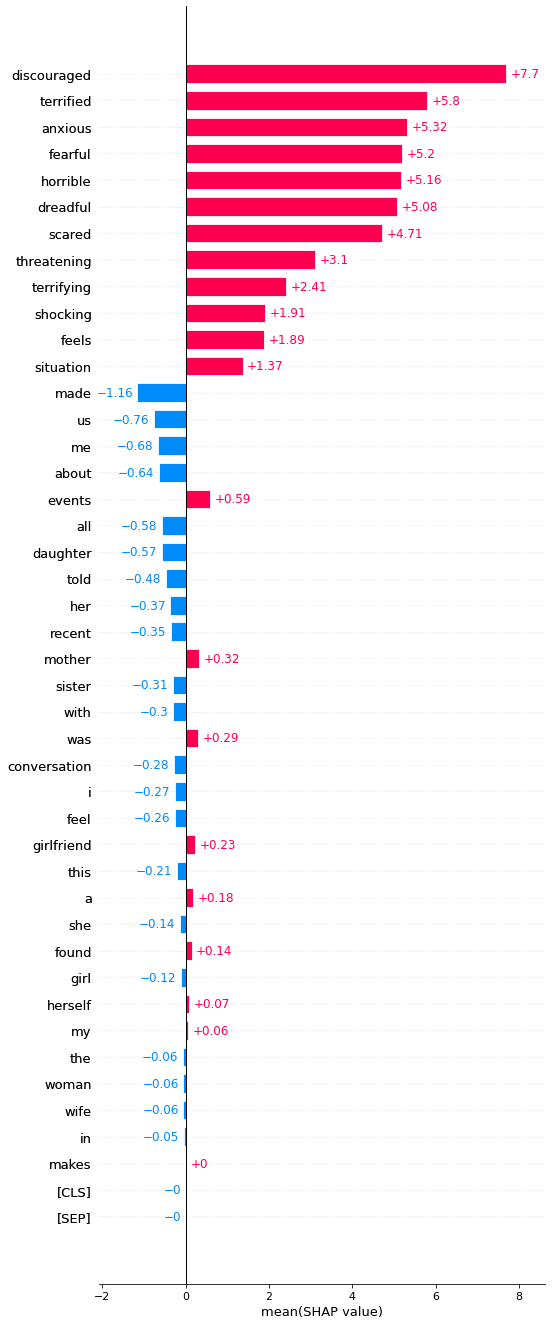

In [ ]:
shap.plots.bar(shap_values[:,:,"NEGATIVE"].mean(0), max_display=50)

Masculine

In [ ]:
mas=[''.join(x for x in par if x not in string.punctuation) for par in mas]
mas=[i.lower() for i in mas]

explainer = shap.Explainer(classifier)
shap_values = explainer(mas[:])




Partition explainer:   5%|▌         | 14/280 [00:00<?, ?it/s]


Partition explainer:   6%|▌         | 16/280 [00:11<01:57,  2.24it/s]


Partition explainer:   6%|▌         | 17/280 [00:12<02:22,  1.84it/s]


Partition explainer:   6%|▋         | 18/280 [00:12<02:17,  1.90it/s]


Partition explainer:   7%|▋         | 19/280 [00:13<02:34,  1.69it/s]


Partition explainer:   7%|▋         | 20/280 [00:14<02:56,  1.48it/s]


Partition explainer:   8%|▊         | 21/280 [00:15<03:03,  1.41it/s]


Partition explainer:   8%|▊         | 22/280 [00:16<03:09,  1.36it/s]


Partition explainer:   8%|▊         | 23/280 [00:16<03:18,  1.29it/s]


Partition explainer:   9%|▊         | 24/280 [00:17<03:25,  1.25it/s]


Partition explainer:   9%|▉         | 25/280 [00:18<03:29,  1.22it/s]


Partition explainer:   9%|▉         | 26/280 [00:19<03:04,  1.38it/s]


Partition explainer:  10%|▉         | 27/280 [00:19<03:07,  1.35it/s]


Partition explainer:  10%|█         | 28/280 [00:20<03:16,  1.28it/s]

In [ ]:
masc_dict=produce_explanation_features(mas[:], "NEGATIVE")

['[CLS]', 'sep', 'he', 'feels', 'anxious', 'cl', '##s', 'this', 'man', 'boy', 'my', 'brother', 'son', 'husband', 'boyfriend', 'father', 'discouraged', 'fearful', 'scared', 'terrified', 'the', 'situation', 'makes', 'him', 'feel', 'i', 'made', 'me', 'found', 'himself', 'in', 'a', 'dreadful', 'horrible', 'shocking', 'terrifying', 'threatening', 'told', 'us', 'all', 'about', 'recent', 'events', 'conversation', 'with', 'was', '[SEP]']
44
44
{'discouraged': 7.640215794011491, 'terrified': 5.744438683164034, 'dreadful': 5.236614075860275, 'horrible': 5.227226155313997, 'anxious': 5.219235377349876, 'fearful': 5.0768803600043135, 'scared': 4.784357477831253, 'threatening': 3.206987445177654, 'terrifying': 2.470229506670728, 'feels': 1.9389975112729363, 'shocking': 1.929996847531599, 'situation': 1.5810214974559622, 'events': 0.6078746049413997, 'boyfriend': 0.23701534014937228, 'was': 0.2121049810871698, 'found': 0.15726753812786023, 'he': 0.140703105615309, 'himself': 0.08049367223177464, 'ma

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


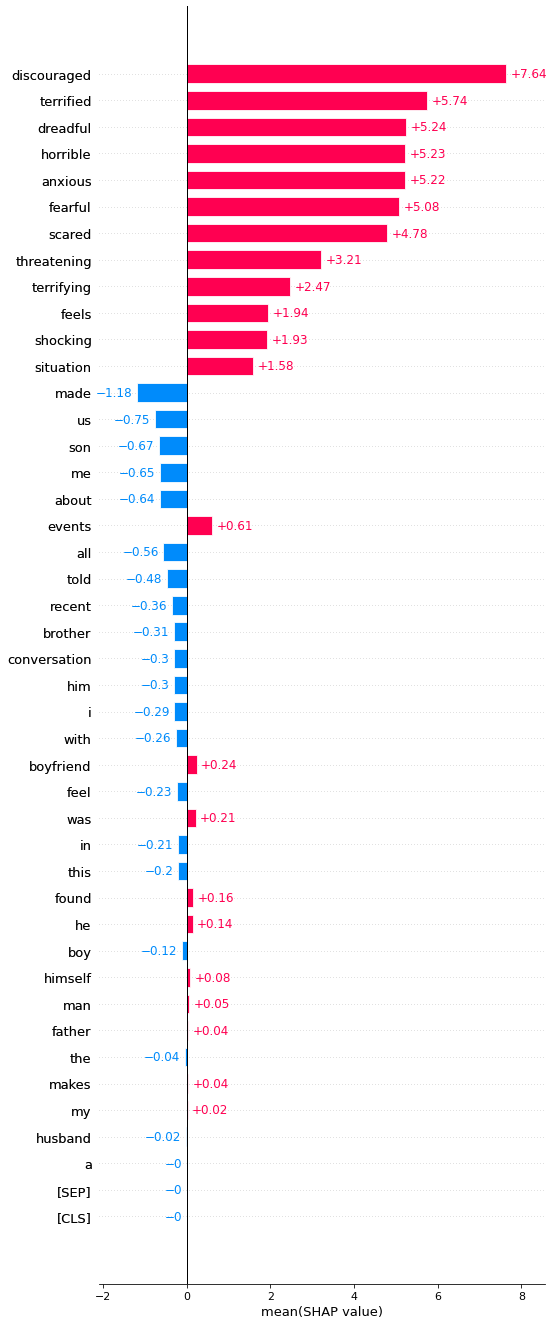

In [ ]:
shap.plots.bar(shap_values[:,:,"NEGATIVE"].mean(0), max_display=50)

Neutral

In [ ]:
neu=[''.join(x for x in par if x not in string.punctuation) for par in neu]
neu=[i.lower() for i in neu]

explainer = shap.Explainer(classifier)
shap_values = explainer(neu[:])




Partition explainer:   5%|▍         | 13/280 [00:00<?, ?it/s]


Partition explainer:   5%|▌         | 15/280 [00:11<01:57,  2.26it/s]


Partition explainer:   6%|▌         | 16/280 [00:12<02:33,  1.72it/s]


Partition explainer:   6%|▌         | 17/280 [00:13<02:51,  1.53it/s]


Partition explainer:   6%|▋         | 18/280 [00:13<02:37,  1.66it/s]


Partition explainer:   7%|▋         | 19/280 [00:14<02:49,  1.54it/s]


Partition explainer:   7%|▋         | 20/280 [00:15<02:57,  1.47it/s]


Partition explainer:   8%|▊         | 21/280 [00:16<03:04,  1.40it/s]


Partition explainer:   8%|▊         | 22/280 [00:16<03:10,  1.35it/s]


Partition explainer:   8%|▊         | 23/280 [00:17<03:21,  1.28it/s]


Partition explainer:   9%|▊         | 24/280 [00:18<03:24,  1.25it/s]


Partition explainer:   9%|▉         | 25/280 [00:19<03:27,  1.23it/s]


Partition explainer:   9%|▉         | 26/280 [00:20<03:08,  1.35it/s]


Partition explainer:  10%|▉         | 27/280 [00:20<03:11,  1.32it/s]

In [ ]:
neu_dict=produce_explanation_features(neu[:], "NEGATIVE")

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


['[CLS]', 'sep', 'they', 'feel', 'anxious', 'cl', '##s', 'this', 'person', 'feels', 'child', 'my', 'sibling', 'spouse', 'partner', 'parent', 'discouraged', 'fearful', 'scared', 'terrified', 'the', 'situation', 'makes', 'them', 'i', 'made', 'me', 'found', 'themselves', 'in', 'a', 'dreadful', 'horrible', 'shocking', 'terrifying', 'threatening', 'told', 'us', 'all', 'about', 'recent', 'events', 'conversation', 'with', 'was', '[SEP]']
43
43
{'discouraged': 7.612683612807613, 'terrified': 5.668933473267488, 'horrible': 5.255545663601736, 'dreadful': 5.22697077474531, 'anxious': 5.154518474224041, 'fearful': 5.023698429014461, 'scared': 4.8070898566926825, 'threatening': 3.4397337769517686, 'terrifying': 2.5333685139907463, 'shocking': 1.9935894754487293, 'feels': 1.9356377434492336, 'situation': 1.5316104797938384, 'events': 0.6187103672096266, 'was': 0.4085963756531957, 'parent': 0.23804422834460012, 'found': 0.05748789411294144, 'themselves': 0.029385848658249364, 'makes': 0.0272886813531

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


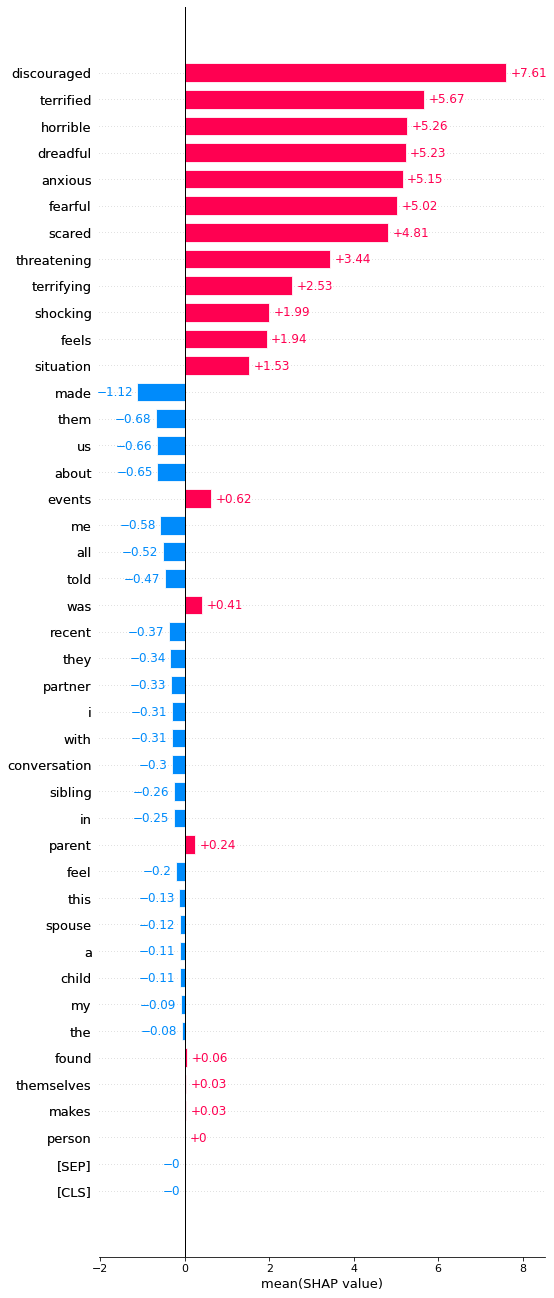

In [ ]:
shap.plots.bar(shap_values[:,:,"NEGATIVE"].mean(0), max_display=50)

#Sad

In [ ]:
mas=[]
fe=[]
neu=[]
with open("Gender/"+emotions[3]+"_m.txt") as f:
  mas=f.readlines()
f.close()
with open("Gender/"+emotions[3]+"_f.txt") as f:
  fe=f.readlines()
f.close()
with open("Gender/"+emotions[3]+"_n.txt") as f:
  neu=f.readlines()
f.close()

Feminine

In [ ]:
fe=[''.join(x for x in par if x not in string.punctuation) for par in fe]
fe=[i.lower() for i in fe]

explainer = shap.Explainer(classifier)
shap_values = explainer(fe[:])





Partition explainer:   5%|▍         | 13/280 [00:00<?, ?it/s]



Partition explainer:   5%|▌         | 15/280 [00:11<02:07,  2.08it/s]



Partition explainer:   6%|▌         | 16/280 [00:12<02:32,  1.73it/s]



Partition explainer:   6%|▌         | 17/280 [00:13<02:47,  1.57it/s]



Partition explainer:   6%|▋         | 18/280 [00:13<02:35,  1.68it/s]



Partition explainer:   7%|▋         | 19/280 [00:14<02:50,  1.53it/s]



Partition explainer:   7%|▋         | 20/280 [00:15<03:11,  1.36it/s]



Partition explainer:   8%|▊         | 21/280 [00:16<03:20,  1.29it/s]



Partition explainer:   8%|▊         | 22/280 [00:17<03:22,  1.27it/s]



Partition explainer:   8%|▊         | 23/280 [00:17<03:24,  1.26it/s]



Partition explainer:   9%|▊         | 24/280 [00:18<03:25,  1.25it/s]



Partition explainer:   9%|▉         | 25/280 [00:19<03:39,  1.16it/s]



Partition explainer:   9%|▉         | 26/280 [00:20<03:21,  1.26it/s]



Partition explainer:  10%|▉         | 27/280 [00:21<03:

In [ ]:
fe_dict=produce_explanation_features(fe[:], "NEGATIVE")

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


['[CLS]', 'sep', 'she', 'feels', 'depressed', 'cl', '##s', 'this', 'woman', 'girl', 'my', 'sister', 'daughter', 'wife', 'girlfriend', 'mother', 'devastated', 'disappointed', 'miserable', 'sad', 'the', 'situation', 'makes', 'her', 'feel', 'i', 'made', 'me', 'found', 'herself', 'in', 'a', 'de', '##pressing', 'gloom', '##y', 'grim', 'heartbreak', '##ing', 'serious', 'told', 'us', 'all', 'about', 'recent', 'events', 'conversation', 'with', 'was', '[SEP]']
47
47
{'miserable': 8.406102030655898, 'depressed': 7.763370386737123, 'disappointed': 7.334541291595492, 'devastated': 6.357551294622068, 'sad': 6.067389583607079, 'grim': 3.4016610951409443, '##pressing': 3.3246278049352953, 'de': 2.917460861078292, 'gloom': 1.9485374306051189, 'feels': 1.6905206373479333, 'situation': 1.260229021641585, '##y': 0.8546997258379312, 'was': 0.5223883793626551, 'mother': 0.3180030840608665, 'girlfriend': 0.22963511950288806, 'a': 0.1615263318810445, 'found': 0.14778271443358798, 'herself': 0.118194668577738

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


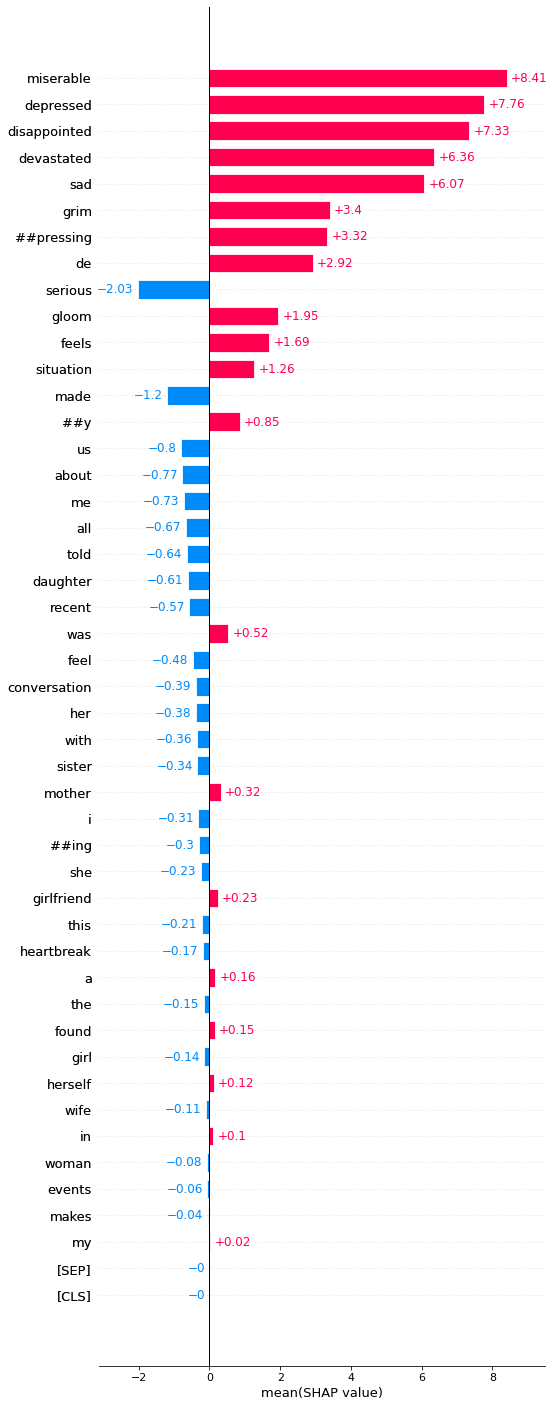

In [ ]:
shap.plots.bar(shap_values[:,:,"NEGATIVE"].mean(0), max_display=50)

Masculine

In [ ]:
mas=[''.join(x for x in par if x not in string.punctuation) for par in mas]
mas=[i.lower() for i in mas]

explainer = shap.Explainer(classifier)
shap_values = explainer(mas[:])





Partition explainer:   5%|▍         | 13/280 [00:00<?, ?it/s]



Partition explainer:   5%|▌         | 15/280 [00:11<01:44,  2.54it/s]



Partition explainer:   6%|▌         | 16/280 [00:12<02:15,  1.95it/s]



Partition explainer:   6%|▌         | 17/280 [00:12<02:36,  1.68it/s]



Partition explainer:   6%|▋         | 18/280 [00:13<02:33,  1.71it/s]



Partition explainer:   7%|▋         | 19/280 [00:14<03:04,  1.42it/s]



Partition explainer:   7%|▋         | 20/280 [00:15<03:25,  1.26it/s]



Partition explainer:   8%|▊         | 21/280 [00:16<03:35,  1.20it/s]



Partition explainer:   8%|▊         | 22/280 [00:17<03:29,  1.23it/s]



Partition explainer:   8%|▊         | 23/280 [00:17<03:33,  1.20it/s]



Partition explainer:   9%|▊         | 24/280 [00:18<03:31,  1.21it/s]



Partition explainer:   9%|▉         | 25/280 [00:19<03:25,  1.24it/s]



Partition explainer:   9%|▉         | 26/280 [00:19<02:59,  1.42it/s]



Partition explainer:  10%|▉         | 27/280 [00:20<03:

In [ ]:
masc_dict=produce_explanation_features(mas[:], "NEGATIVE")

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


['[CLS]', 'sep', 'he', 'feels', 'depressed', 'cl', '##s', 'this', 'man', 'boy', 'my', 'brother', 'son', 'husband', 'boyfriend', 'father', 'devastated', 'disappointed', 'miserable', 'sad', 'the', 'situation', 'makes', 'him', 'feel', 'i', 'made', 'me', 'found', 'himself', 'in', 'a', 'de', '##pressing', 'gloom', '##y', 'grim', 'heartbreak', '##ing', 'serious', 'told', 'us', 'all', 'about', 'recent', 'events', 'conversation', 'with', 'was', '[SEP]']
47
47
{'miserable': 8.35353105000591, 'depressed': 7.729992866769484, 'disappointed': 7.282582203117666, 'devastated': 6.29258065778285, 'sad': 6.0170011483733425, 'grim': 3.5254845067739455, '##pressing': 3.355327526924983, 'de': 2.928091257907725, 'gloom': 1.9811714663455195, 'feels': 1.7196379775662813, 'situation': 1.4307674403153927, '##y': 0.871594758000331, 'was': 0.5222001388425873, 'boyfriend': 0.19613069847615716, 'found': 0.1509251294199359, 'himself': 0.08342500737886235, 'he': 0.07769886298108514, 'makes': 0.06230528359040771, 'man

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


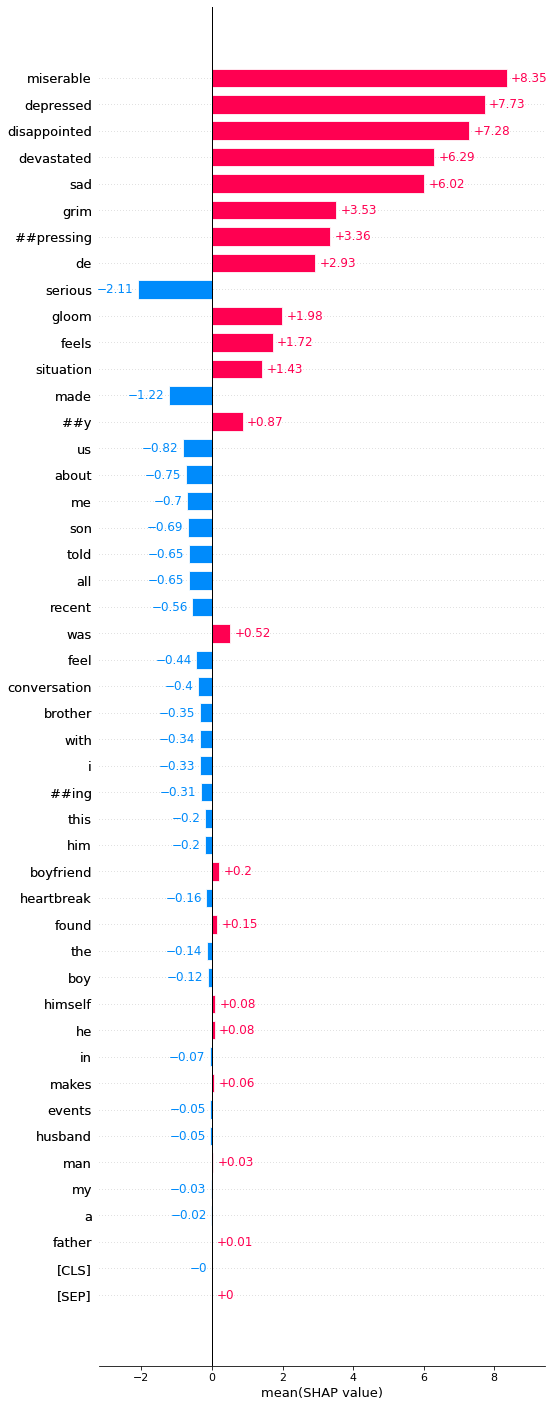

In [ ]:
shap.plots.bar(shap_values[:,:,"NEGATIVE"].mean(0), max_display=50)

Neutral


In [ ]:
neu=[''.join(x for x in par if x not in string.punctuation) for par in neu]
neu=[i.lower() for i in neu]

explainer = shap.Explainer(classifier)
shap_values = explainer(neu[:])





Partition explainer:   4%|▍         | 12/280 [00:00<?, ?it/s]



Partition explainer:   5%|▌         | 14/280 [00:11<02:03,  2.16it/s]



Partition explainer:   5%|▌         | 15/280 [00:12<02:32,  1.74it/s]



Partition explainer:   6%|▌         | 16/280 [00:13<03:04,  1.43it/s]



Partition explainer:   6%|▌         | 17/280 [00:14<03:23,  1.29it/s]



Partition explainer:   6%|▋         | 18/280 [00:14<03:00,  1.45it/s]



Partition explainer:   7%|▋         | 19/280 [00:15<03:08,  1.38it/s]



Partition explainer:   7%|▋         | 20/280 [00:16<03:14,  1.33it/s]



Partition explainer:   8%|▊         | 21/280 [00:17<03:31,  1.23it/s]



Partition explainer:   8%|▊         | 22/280 [00:18<03:41,  1.16it/s]



Partition explainer:   8%|▊         | 23/280 [00:19<03:37,  1.18it/s]



Partition explainer:   9%|▊         | 24/280 [00:20<03:42,  1.15it/s]



Partition explainer:   9%|▉         | 25/280 [00:21<03:48,  1.12it/s]



Partition explainer:   9%|▉         | 26/280 [00:21<03:

In [ ]:
neu_dict=produce_explanation_features(neu[:], "NEGATIVE")

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


['[CLS]', 'sep', 'they', 'feel', 'depressed', 'cl', '##s', 'this', 'person', 'feels', 'child', 'my', 'sibling', 'spouse', 'partner', 'parent', 'devastated', 'disappointed', 'miserable', 'sad', 'the', 'situation', 'makes', 'them', 'i', 'made', 'me', 'found', 'themselves', 'in', 'a', 'de', '##pressing', 'gloom', '##y', 'grim', 'heartbreak', '##ing', 'serious', 'told', 'us', 'all', 'about', 'recent', 'events', 'conversation', 'with', 'was', '[SEP]']
46
46
{'miserable': 8.413741358946638, 'depressed': 7.763209264163933, 'disappointed': 7.308958955096145, 'devastated': 6.316829473762798, 'sad': 6.034156681575462, 'grim': 3.7087773165952194, '##pressing': 3.318375492897964, 'de': 3.001277555387334, 'gloom': 1.9327143661055783, 'feels': 1.744698020860096, 'situation': 1.4214025399186125, '##y': 0.9465368956958041, 'was': 0.6449854645464302, 'parent': 0.2499786920185403, 'found': 0.08848486803376987, 'themselves': 0.049591955073501115, 'person': 0.03350675409614002, 'makes': 0.0127122320818220

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


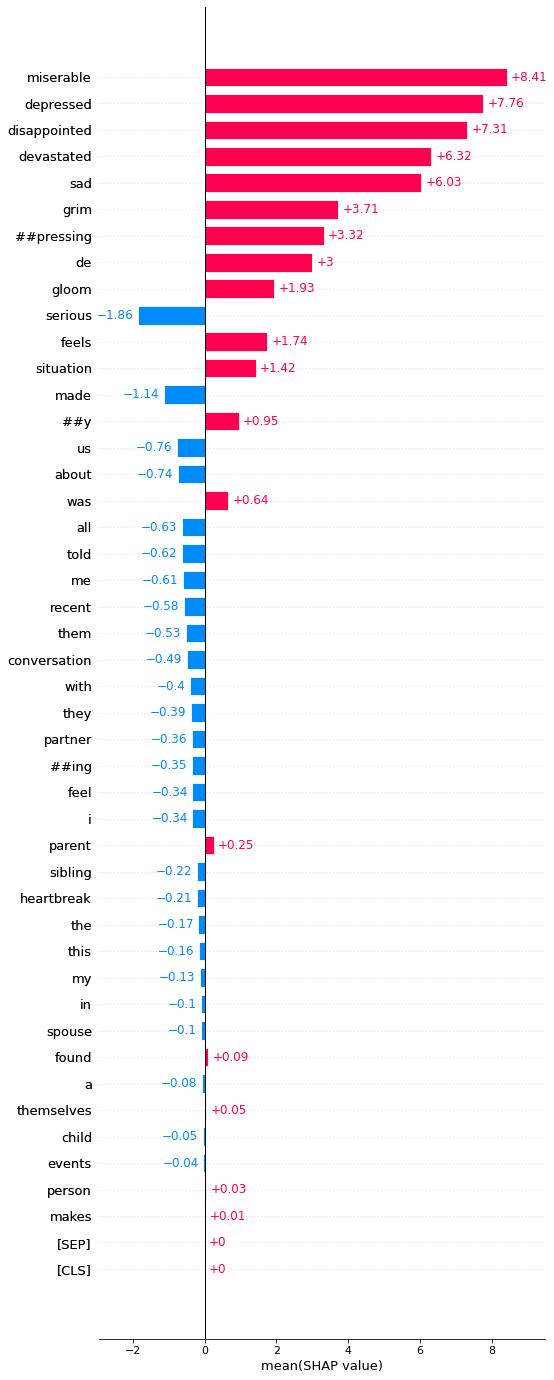

In [ ]:
shap.plots.bar(shap_values[:,:,"NEGATIVE"].mean(0), max_display=50)

#Work

SHAP allows us to identify the contribute of each feature in the input to the prediction by calculating the Shapely value of each feature, calculated with the following equation. 


This would involve calculating the marginal contribution of every feature, by considering all possible permutations (which totals to N! permutations, where N denotes the number of features). We take into consideration the mean of the contributions of all features in order to estimate it's aggregate contribution to the prediction of a particular class. In other words, we could say that the Shapely value is an indicator of how much weight a particular feature carries, which is also the difference between the actual prediction and the base prediction measured by the classifier.